In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()  # load iris dataset
x = iris.data
y = iris.target
d = [{"sepal_length":row[0], 
      "sepal_width":row[1], 
      "petal_length":row[2], 
      "petal_width":row[3]} for row in x]
df = pd.DataFrame(d) # construct dataframe
df["types"] = y # assign types
df = df.sample(frac=1.0) # random shuffle rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,types
123,6.3,2.7,4.9,1.8,2
61,5.9,3.0,4.2,1.5,1
49,5.0,3.3,1.4,0.2,0
98,5.1,2.5,3.0,1.1,1
100,6.3,3.3,6.0,2.5,2


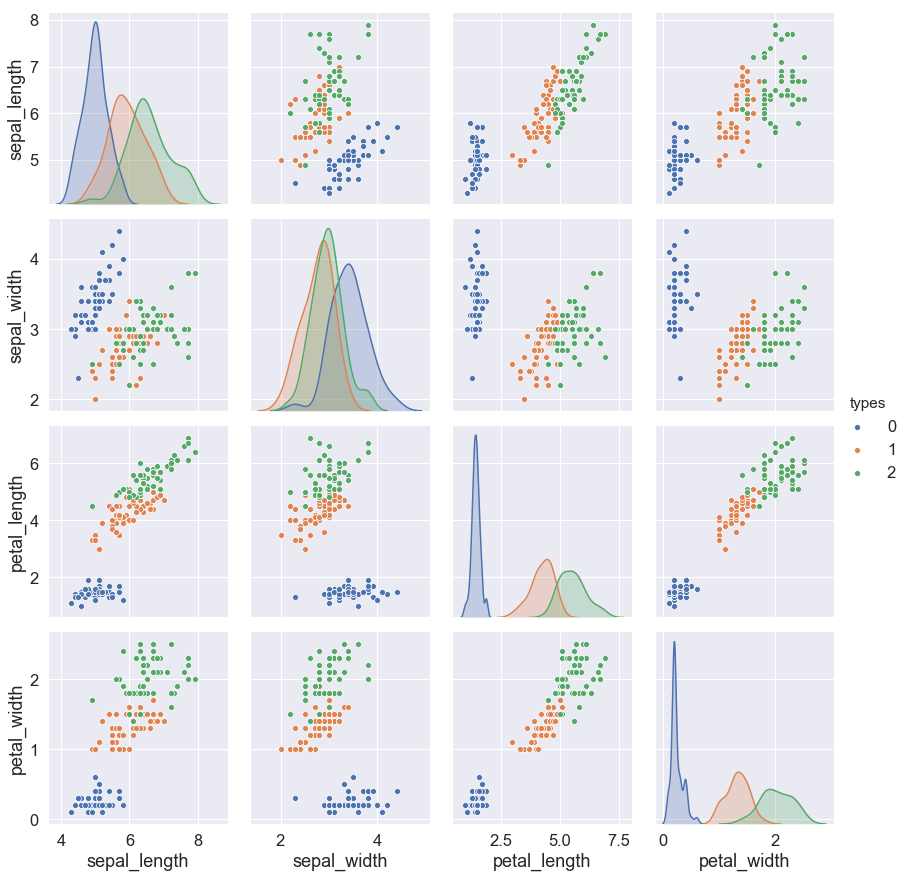

In [4]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.pairplot(df,hue="types",size=3);
plt.show()

In [5]:
# train test split, ratio = 0.8
features = df[["sepal_length","sepal_width","petal_length","petal_width"]]
types = df["types"]
train_features, test_features, train_types, test_types = train_test_split(features,types,train_size=0.8, random_state=1)

In [6]:
#scikit learn decision tree model trainig 
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_features, train_types)

In [7]:
prediction = clf.predict(test_features)

In [8]:
# evaluation for multi class classification
from sklearn.metrics import classification_report
print(classification_report(test_types, prediction, target_names=["type0","type1","type2"]))

              precision    recall  f1-score   support

       type0       1.00      1.00      1.00        13
       type1       0.89      1.00      0.94         8
       type2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

